Setup

In [14]:
pip install opencv-python matplotlib tensorflow tensorflow-gpu 

Note: you may need to restart the kernel to use updated packages.


In [15]:
pip list

Package                      Version
---------------------------- --------------
absl-py                      2.1.0
anyio                        4.6.2.post1
argon2-cffi                  23.1.0
argon2-cffi-bindings         21.2.0
arrow                        1.3.0
asttokens                    2.4.1
astunparse                   1.6.3
async-lru                    2.0.4
attrs                        24.2.0
babel                        2.16.0
beautifulsoup4               4.12.3
bleach                       6.2.0
cachetools                   5.5.0
certifi                      2024.8.30
cffi                         1.17.1
charset-normalizer           3.4.0
colorama                     0.4.6
comm                         0.2.2
contourpy                    1.3.0
cycler                       0.12.1
debugpy                      1.8.7
decorator                    5.1.1
defusedxml                   0.7.1
exceptiongroup               1.2.2
executing                    2.1.0
fastjsonschema             

In [2]:
import tensorflow as tf
import os

In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

Data Loading

In [4]:
pip install kagglehub

Note: you may need to restart the kernel to use updated packages.


In [5]:
import kagglehub
# Download latest version
path = kagglehub.dataset_download("amandam1/healthy-vs-diseased-leaf-image-dataset")
print("Path to dataset files:", path)

C:\Users\aakas\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\aakas\.cache\kagglehub\datasets\amandam1\healthy-vs-diseased-leaf-image-dataset\versions\1


In [6]:
import shutil
def copy_folder(src, dst):
    """Copies a folder and its contents from src to dst."""

    if not os.path.exists(dst):
        os.makedirs(dst)

    for item in os.listdir(src):
        s = os.path.join(src, item)
        d = os.path.join(dst, item)

        if os.path.isdir(s):
            copy_folder(s, d)  # Recursively copy subfolders
        else:
            shutil.copy2(s, d)  # Copy files

# Example usage
src_folder = 'C:/Users/aakas/.cache/kagglehub/datasets/amandam1/healthy-vs-diseased-leaf-image-dataset/versions/1'
dst_folder = 'C:/Users/aakas/PythonWork/IntroImageClassification'
copy_folder(src_folder, dst_folder)

In [7]:
import cv2
import imghdr
from matplotlib import pyplot as plt
import random

In [8]:
def get_folder_sizes(path):
    folder_sizes = {}
    for root, dirs, files in os.walk(path):
        for dir in dirs:
            dir_path = os.path.join(root, dir)
            total_size = 0
            for dirpath, _, filenames in os.walk(dir_path):
                for file in filenames:
                    file_path = os.path.join(dirpath, file)
                    total_size += os.path.getsize(file_path)
            folder_sizes[dir_path] = total_size
    return folder_sizes

def format_size(size):
    for unit in ['B', 'KB', 'MB', 'GB', 'TB']:
        if size < 1024:
            return f"{size:.2f} {unit}"
        size /= 1024

folder_sizes = get_folder_sizes(path)

for folder, size in folder_sizes.items():
    print(f"{folder}: {format_size(size)}")

C:\Users\aakas\.cache\kagglehub\datasets\amandam1\healthy-vs-diseased-leaf-image-dataset\versions\1\A Database of Leaf Images: 6.44 GB
C:\Users\aakas\.cache\kagglehub\datasets\amandam1\healthy-vs-diseased-leaf-image-dataset\versions\1\A Database of Leaf Images\Alstonia Scholaris (P2): 701.91 MB
C:\Users\aakas\.cache\kagglehub\datasets\amandam1\healthy-vs-diseased-leaf-image-dataset\versions\1\A Database of Leaf Images\Arjun (P1): 673.88 MB
C:\Users\aakas\.cache\kagglehub\datasets\amandam1\healthy-vs-diseased-leaf-image-dataset\versions\1\A Database of Leaf Images\Chinar (P11): 352.72 MB
C:\Users\aakas\.cache\kagglehub\datasets\amandam1\healthy-vs-diseased-leaf-image-dataset\versions\1\A Database of Leaf Images\Gauva (P3): 685.48 MB
C:\Users\aakas\.cache\kagglehub\datasets\amandam1\healthy-vs-diseased-leaf-image-dataset\versions\1\A Database of Leaf Images\Jamun (P5): 1004.72 MB
C:\Users\aakas\.cache\kagglehub\datasets\amandam1\healthy-vs-diseased-leaf-image-dataset\versions\1\A Databas

In [9]:
path = "C:/Users/aakas/PythonWork/IntroImageClassification/A Database of Leaf Images/Jamun (P5)"
for image in os.listdir(path):
  print(image)

diseased
healthy


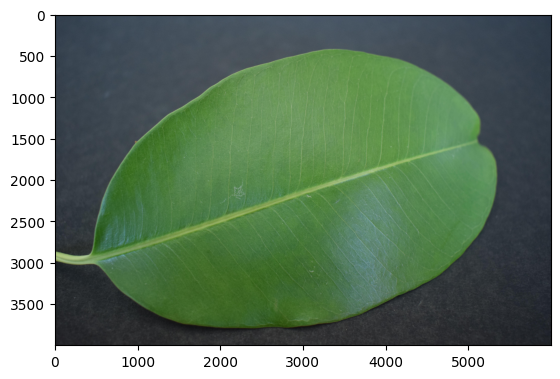

In [10]:
healthy = os.path.join(path, "healthy")
healthyNames = [f for f in os.listdir(healthy) if os.path.isfile(os.path.join(healthy, f))]
randomName = healthyNames[random.randint(0, len(healthyNames))]
diseased = os.path.join(path, "diseased")
image = cv2.imread(os.path.join(path, "healthy", randomName))
image.shape
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))


Load Data

In [11]:
import numpy as np

In [12]:
data = tf.keras.utils.image_dataset_from_directory(path)

Found 624 files belonging to 2 classes.


In [13]:
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

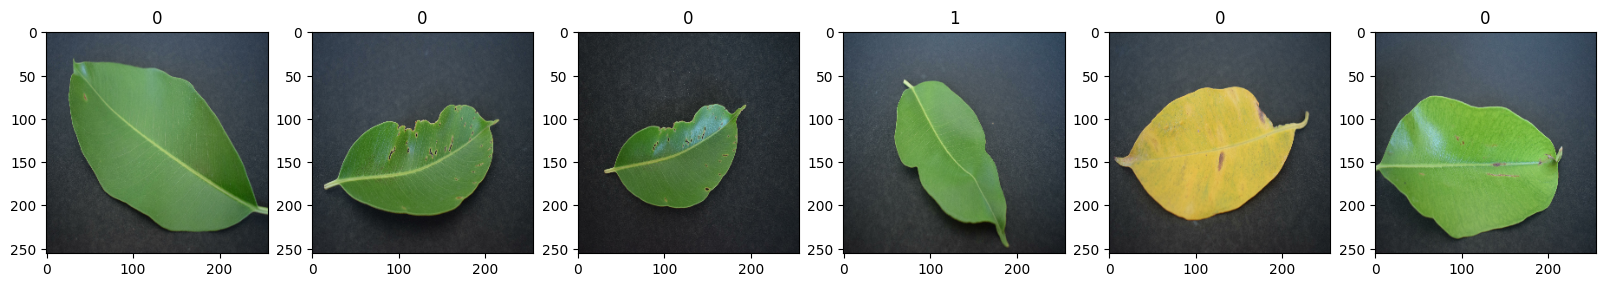

In [14]:
fig, ax = plt.subplots(ncols=6, figsize=(20,20))
for idx, img in enumerate(batch[0][:6]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

Preprocess

In [15]:
data = data.map(lambda x,y: (x/255, y))

Set Training Data

In [16]:
len(data)

20

In [17]:
trainSize = int(len(data)*.7)
valSize = int(len(data)*.2)
testSize = int(len(data)*.1)
print(trainSize, valSize, testSize)

14 4 2


In [18]:
train = data.take(trainSize)
val = data.skip(trainSize).take(valSize)
test = data.skip(trainSize+valSize).take(testSize)

CNN Model

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [20]:
model = Sequential()

In [21]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dense(1, activation="sigmoid"))


In [22]:
model.compile('adam', loss = tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [26]:
logdir = 'logs'


In [27]:
callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [29]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[callback])

Epoch 1/20
14/14 [==============================] - 11s 635ms/step - loss: 0.6746 - accuracy: 0.6272 - val_loss: 0.6814 - val_accuracy: 0.5156
Epoch 2/20
14/14 [==============================] - 10s 630ms/step - loss: 0.5847 - accuracy: 0.6897 - val_loss: 0.4891 - val_accuracy: 0.7891
Epoch 3/20
14/14 [==============================] - 10s 633ms/step - loss: 0.4937 - accuracy: 0.7634 - val_loss: 0.5125 - val_accuracy: 0.7969
Epoch 4/20
14/14 [==============================] - 10s 653ms/step - loss: 0.4332 - accuracy: 0.8214 - val_loss: 0.3670 - val_accuracy: 0.8516
Epoch 5/20
14/14 [==============================] - 11s 707ms/step - loss: 0.3618 - accuracy: 0.8393 - val_loss: 0.2884 - val_accuracy: 0.8828
Epoch 6/20
14/14 [==============================] - 12s 736ms/step - loss: 0.3182 - accuracy: 0.8772 - val_loss: 0.3530 - val_accuracy: 0.8906
Epoch 7/20
14/14 [==============================] - 12s 728ms/step - loss: 0.2680 - accuracy: 0.8996 - val_loss: 0.2679 - val_accuracy: 0.9141

Testing Sucesss

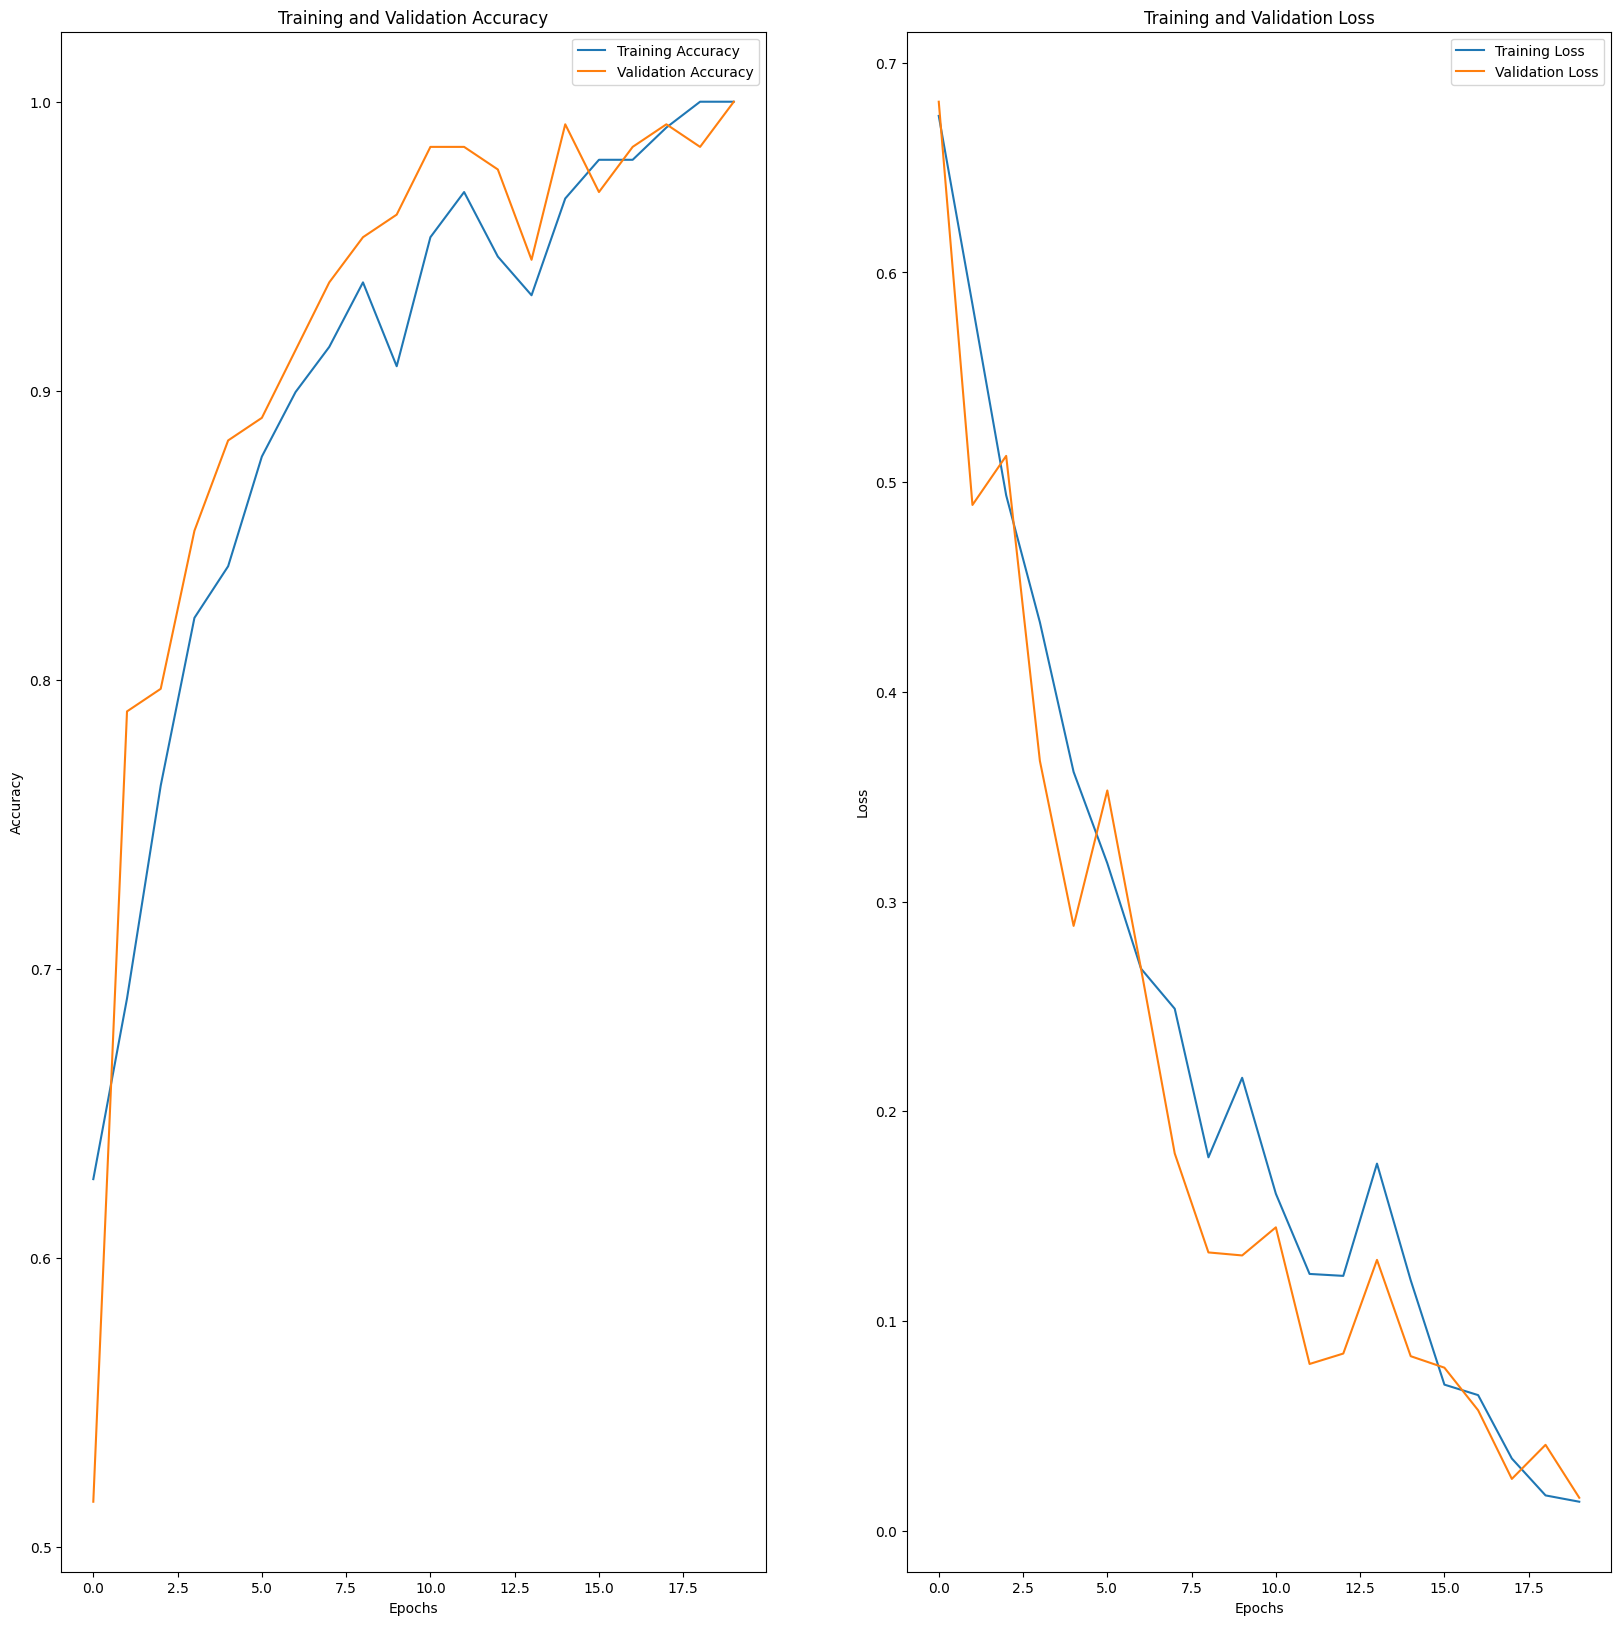

In [30]:
fig, ax = plt.subplots(ncols=2, figsize=(20,20))
ax[0].plot(hist.history['accuracy'], label='Training Accuracy')
ax[0].plot(hist.history['val_accuracy'], label='Validation Accuracy')
ax[0].set_title('Training and Validation Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend()

# Plot loss
ax[1].plot(hist.history['loss'], label='Training Loss')
ax[1].plot(hist.history['val_loss'], label='Validation Loss')
ax[1].set_title('Training and Validation Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend()

Testing

In [31]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [32]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [33]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 84ms/step


In [34]:
import cv2

In [45]:
def check(yhat):
    if(yhat>.5):
        print("healthy")
    else:
        print("diseased")

In [46]:
img = cv2.imread("disease.png")
corrected = tf.image.resize(img, (256,256))
yhat = model.predict(np.expand_dims(corrected/255, 0))
print(yhat)
check(yhat)

1/1 [==============================] - 0s 34ms/step
[[0.00088069]]
diseased


Finalizing Model

In [47]:
from tensorflow.keras.models import load_model

In [48]:
model.save(os.path.join('models','jamundiseased.h5'))

In [51]:
new_model = load_model('models/jamundiseased.h5')

In [58]:
healthy = tf.image.resize(cv2.imread("healthy.png"),(256,256))
xhat = new_model.predict(np.expand_dims(healthy/255, 0))
print(xhat)
check(xhat)

1/1 [==============================] - 0s 26ms/step
[[0.99990535]]
healthy
